# Hands Gesture Classifier


### Table of Contents:
* [1. Import of libraries](#1.-Import-of-libraries)
* [2. Prepare Workplace](#2.-Prepare-Workplace)
* [3. Data mining](#3.-Data-mining) 
    * [3.1 Implement Simple Camera Capture](#3.1-Implement-Simple-Camera-Capture) 
    * [3.2 Prepare dataset file](#3.2-Prepare-dataset-file)   
    * [3.3 Create hand gesture dataset](#3.3-Create-hand-gesture-dataset) 
* [4. Data Visualization](#4.-Data-Visualization)
* [5. Preprocessing](#5.-Preprocessing)
* [6. Prepare Classicication models](#6.-Prepare-Classicication-models)      
    * [6.1 Division of data into a training set and a test set](#6.1-Division-of-data-into-a-training-set-and-a-test-set)
    * [6.2 Classification models](#6.2-Classification-models)
        * [6.2.1 Logistic Regression](#6.2.1-Logistic-Regression) 
        * [6.2.2 Ridge Classifier](#6.2.2-Ridge-Classifier)
        * [6.2.3 Random Forest Classifier](#6.2.3-Random-Forest-Classifier)
        * [6.2.4 Gradient Boosting Classifier](#6.2.4-Gradient-Boosting-Classifier)
    * [6.3 Testing models](#6.3-Testing-models)
        * [6.3.1 Logistic Regression](#6.3.1-Logistic-Regression)
        * [6.3.2 Ridge Classifier](#6.3.2-Ridge-Classifier)
        * [6.3.3 Random Forest Classifier](#6.3.3-Random-Forest-Classifier)
        * [6.3.4 Gradient Boosting Classifier](#6.3.4-Gradient-Boosting-Classifier)
* [7. Compare the results](#7.-Compare-the-results)
* [8. Save model](#8.-Save-model)
    * [8.1 Prepare file with model](#8.1-Prepare-file-with-model)
    * [8.2. Live presentation (with camera)](#8.2.-Live-presentation-(with-camera))


# 1. Import of libraries
---

In [1]:
!pip install opencv-python==4.5.3.56 
!pip install mediapipe==0.8.8 
!pip install autopy==4.0.0

In [2]:
import os
import csv

import uuid
import time
import pickle
import sklearn
import cv2 
import pickle
import autopy

import pandas as pd
import mediapipe as mp 
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from hcs.camera_video_capture import CameraVideoCapture
import hcs.hand_detector as hd

from hcs.utils.hand_utils import prepare_hand_data, draw_hand_gesture
from hcs.models import GestureType, HandType

sklearn.__version__

'0.24.1'

# 2. Prepare Workplace
---

### Constants variables

In [3]:
COORDS_FILE_NAME = 'hand_gesture_coords.csv'
MODEL_FILE_NAME = 'hand-gestures-model.pkl'

DATA_DIRECTORY = os.path.join('data')

### Setup Folders

Create a directory where the sample photos will be saved.

In [4]:
if not os.path.exists(DATA_DIRECTORY):
    if os.name == 'posix':
        !mkdir -p {DATA_DIRECTORY}
    if os.name == 'nt':
        !mkdir {DATA_DIRECTORY}
else: 
    print(f'The directory `{DATA_DIRECTORY}` already exists')

The directory `data` already exists


# 3. Data mining
---

## 3.1 Implement Simple Camera Capture

In [5]:
cam_width, cam_height = 1280, 720

cap = cv2.VideoCapture(0)
cap.set(3, cam_width)
cap.set(4, cam_height)

detector = hd.HandDetector(max_num_hands=2)
    
while cap.isOpened():
    success, img = cap.read()
    
    imgname = os.path.join(DATA_DIRECTORY, '{}.jpg'.format(str(uuid.uuid1())))
    cv2.imwrite(imgname, img)
    time.sleep(2)
    
    all_hands, img = detector.find_hands(img)
    if all_hands:
        hand = all_hands[0]
        hand_landmarks_list = all_hands[0].landmarks
        

    cv2.imshow("Hands Gesture Classifier", img)
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

Read saved photo

In [5]:
hand_landmarks_list = []
hand = None

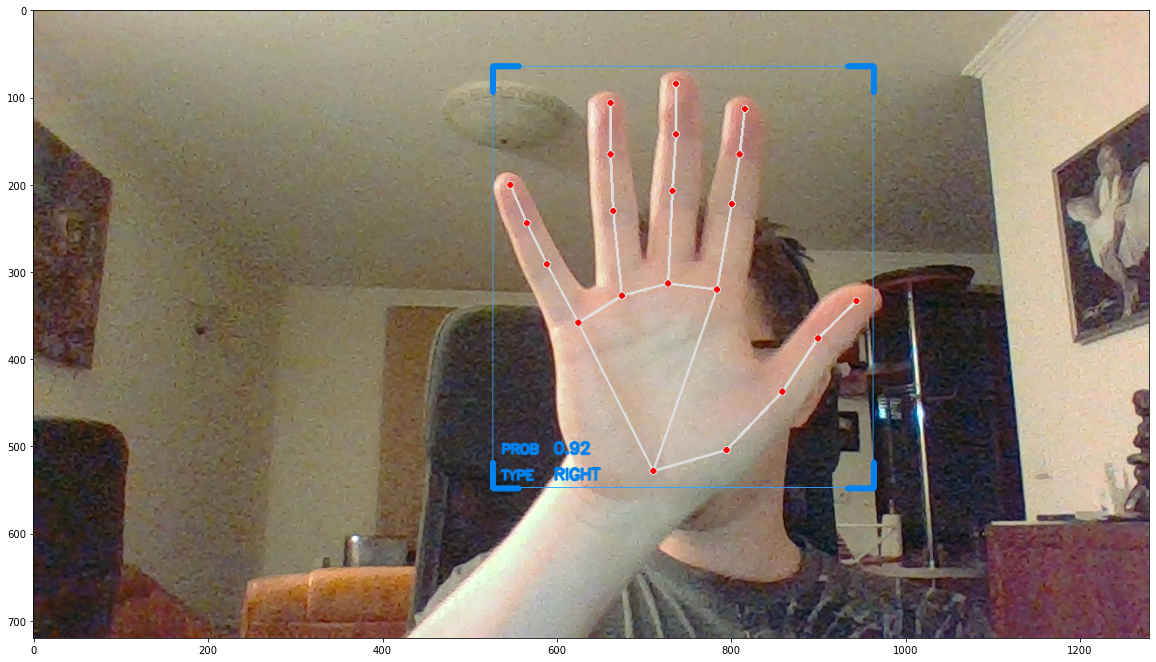

In [6]:
file_name = '92cc76f1-29ea-11ec-a40d-0897987f9062.jpg'

detector = hd.HandDetector(max_num_hands=2)

img = cv2.imread(os.path.join(DATA_DIRECTORY, file_name))

all_hands, img = detector.find_hands(img)
if all_hands:
    hand = all_hands[0]
    hand_landmarks_list = hand.landmarks

# Show image 
plt.figure(figsize=(20,12))

img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
imgplot = plt.imshow(img)
plt.show()

In [7]:
number_coords = len(hand_landmarks_list)

number_coords

21

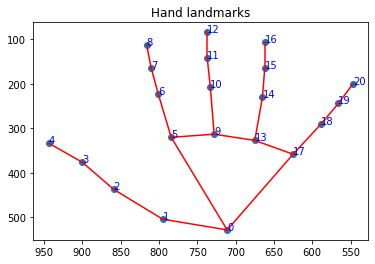

In [8]:
draw_hand_gesture(hand_landmarks_list, 'Hand landmarks')

Change of ranges to [0,1]


In [9]:
new_landmarks = prepare_hand_data(hand)
new_landmarks

[[0.42105263157894735, 0.9586776859504132, 0.0],
 [0.6132723112128147, 0.9090909090909092, -0.039770208299160004],
 [0.7597254004576659, 0.7706611570247934, -0.06088509038090706],
 [0.8535469107551488, 0.6446280991735538, -0.079563669860363],
 [0.954233409610984, 0.5557851239669421, -0.09956339746713638],
 [0.5881006864988558, 0.5289256198347108, -0.040834058076143265],
 [0.6270022883295194, 0.32644628099173556, -0.06816041469573975],
 [0.6475972540045767, 0.20867768595041322, -0.08831184357404709],
 [0.6613272311212814, 0.1012396694214876, -0.10328700393438339],
 [0.459954233409611, 0.5144628099173554, -0.044014159590005875],
 [0.47139588100686497, 0.29545454545454547, -0.06802450120449066],
 [0.4805491990846682, 0.16115702479338845, -0.08877452462911606],
 [0.4805491990846682, 0.04132231404958678, -0.10616964846849442],
 [0.33867276887871856, 0.5433884297520661, -0.05274256318807602],
 [0.3157894736842105, 0.34297520661157027, -0.08239372074604034],
 [0.30892448512585813, 0.208677685

Draw hand chart 

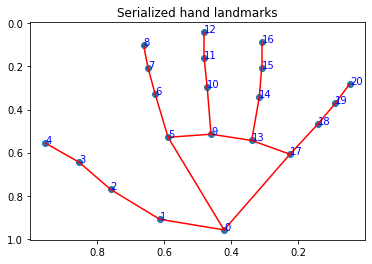

In [10]:
draw_hand_gesture(new_landmarks, 'Serialized hand landmarks')

## 3.2 Prepare dataset file

### Create column headers

Columns starts with [targer index, hand_type index, ...hand landmarks coords] 

In [11]:
columns = ['target', 'hand_type']
for val in range(1, number_coords + 1):
    columns += [f'x_{val}', f'y_{val}', f'z_{val}']
    
print(columns)

['target', 'hand_type', 'x_1', 'y_1', 'z_1', 'x_2', 'y_2', 'z_2', 'x_3', 'y_3', 'z_3', 'x_4', 'y_4', 'z_4', 'x_5', 'y_5', 'z_5', 'x_6', 'y_6', 'z_6', 'x_7', 'y_7', 'z_7', 'x_8', 'y_8', 'z_8', 'x_9', 'y_9', 'z_9', 'x_10', 'y_10', 'z_10', 'x_11', 'y_11', 'z_11', 'x_12', 'y_12', 'z_12', 'x_13', 'y_13', 'z_13', 'x_14', 'y_14', 'z_14', 'x_15', 'y_15', 'z_15', 'x_16', 'y_16', 'z_16', 'x_17', 'y_17', 'z_17', 'x_18', 'y_18', 'z_18', 'x_19', 'y_19', 'z_19', 'x_20', 'y_20', 'z_20', 'x_21', 'y_21', 'z_21']


Create dataset file and save prepared columns names in it 

In [12]:
if not os.path.exists(os.path.join(COORDS_FILE_NAME)):
    with open(COORDS_FILE_NAME, mode='w', newline='') as f:
        csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
        csv_writer.writerow(columns)
else:
    print(f'File `{COORDS_FILE_NAME}` already exists')

File `hand_gesture_coords.csv` already exists


In [13]:
for a in GestureType:
    print(a.name)

NEUTRAL
CLICK
GRAB
GO_BACK
GO_FORWARD


## 3.3 Create hand gesture dataset 

In [14]:
def create_gesture_dataset(gesture_type: GestureType, hand_type: HandType, sample_num = 1000):
    """
    The function reads the location with all landmarks via a webcam. Pre-processes the data. 
    It also saves the finished data in a file.
    :param gesture_type: Gesture type for which the samples will be created.
    :param hand_type: Type of hand for which the samples will be created.
    :param sample_num: Number of samples created for action type.
    """
    cam_width, cam_height = 1280, 720
    cap = cv2.VideoCapture(0)
    cap.set(3, cam_width)
    cap.set(4, cam_height)

    detector = hd.HandDetector(max_num_hands=2, min_detection_confidence=0.8, min_tracking_confidence=0.8)
    
    count = 0
    
    while cap.isOpened():
        success, img = cap.read()
        all_hands, img = detector.find_hands(img)
       
        for hand in all_hands:
            if hand.type == hand_type:
                landmarks = prepare_hand_data(hand)
                
                row = list(np.array(landmarks).flatten())
                row.insert(0, gesture_type.value) 
                row.insert(1, hand_type.value) 
                
                # Save to file
                with open(COORDS_FILE_NAME, mode='a', newline='') as f:
                    csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
                    csv_writer.writerow(row)
                
                count = count + 1
        
        cv2.putText(img, f'SAMPLES: {count}/{sample_num}', (20, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (240, 130, 0), 2, cv2.LINE_AA)
        cv2.imshow("Hands Gesture Classifier", img)
        
        if count >= sample_num:
            break
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

In [15]:
# create_gesture_dataset(GestureType(4), HandType.LEFT)

# 4. Data Visualization
---

In [7]:
gesture_type_mapper = {}

for a in GestureType:
    gesture_type_mapper[a.value] = a.name
    
gesture_type_mapper

{0: 'NEUTRAL', 1: 'CLICK', 2: 'GRAB', 3: 'GO_BACK', 4: 'GO_FORWARD'}

##### Load data from file

In [8]:
df = pd.read_csv(COORDS_FILE_NAME)

df

,target,hand_type,x_1,y_1,z_1,x_2,y_2,z_2,x_3,y_3,...,z_18,x_19,y_19,z_19,x_20,y_20,z_20,x_21,y_21,z_21
0,0,1,0.287234,0.934641,0.0,0.611702,0.866013,-0.013058,0.797872,0.722222,...,-0.008492,0.117021,0.395425,-0.016605,0.127660,0.297386,-0.022703,0.132979,0.212418,-0.026433
1,0,1,0.263959,0.933993,0.0,0.598985,0.864686,-0.015269,0.786802,0.716172,...,-0.004268,0.121827,0.372937,-0.011629,0.147208,0.277228,-0.018768,0.162437,0.188119,-0.023462
2,0,1,0.260204,0.934426,0.0,0.602041,0.865574,-0.014787,0.785714,0.718033,...,-0.005061,0.117347,0.373770,-0.012183,0.142857,0.278689,-0.018888,0.158163,0.190164,-0.023301
3,0,1,0.261307,0.935484,0.0,0.597990,0.864516,-0.016072,0.778894,0.719355,...,-0.000480,0.110553,0.374194,-0.007064,0.135678,0.277419,-0.014129,0.155779,0.190323,-0.018787
4,0,1,0.256281,0.935691,0.0,0.587940,0.868167,-0.016668,0.773869,0.723473,...,-0.002834,0.105528,0.372990,-0.010303,0.125628,0.279743,-0.017665,0.140704,0.192926,-0.022475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,4,0,0.866120,0.924528,0.0,0.653005,0.822642,-0.018758,0.404372,0.660377,...,-0.021385,0.945355,0.177358,-0.023247,0.907104,0.381132,-0.009653,0.857923,0.445283,0.003821
5996,4,0,0.856000,0.924242,0.0,0.640000,0.825758,-0.020293,0.394667,0.659091,...,-0.028239,0.946667,0.155303,-0.031461,0.912000,0.367424,-0.017645,0.877333,0.446970,-0.004013
5997,4,0,0.883117,0.929078,0.0,0.644156,0.797872,-0.013205,0.400000,0.673759,...,-0.031873,0.942857,0.152482,-0.030776,0.903896,0.361702,-0.014745,0.875325,0.446809,-0.000574
5998,4,0,0.898219,0.929825,0.0,0.664122,0.810526,-0.014614,0.407125,0.670175,...,-0.037628,0.944020,0.150877,-0.038914,0.908397,0.364912,-0.021150,0.877863,0.438596,-0.004459


In [9]:
df.isnull()

,target,hand_type,x_1,y_1,z_1,x_2,y_2,z_2,x_3,y_3,...,z_18,x_19,y_19,z_19,x_20,y_20,z_20,x_21,y_21,z_21
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [19]:
df.isnull().sum().sum()

0

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 65 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   target     6000 non-null   int64  
 1   hand_type  6000 non-null   int64  
 2   x_1        6000 non-null   float64
 3   y_1        6000 non-null   float64
 4   z_1        6000 non-null   float64
 5   x_2        6000 non-null   float64
 6   y_2        6000 non-null   float64
 7   z_2        6000 non-null   float64
 8   x_3        6000 non-null   float64
 9   y_3        6000 non-null   float64
 10  z_3        6000 non-null   float64
 11  x_4        6000 non-null   float64
 12  y_4        6000 non-null   float64
 13  z_4        6000 non-null   float64
 14  x_5        6000 non-null   float64
 15  y_5        6000 non-null   float64
 16  z_5        6000 non-null   float64
 17  x_6        6000 non-null   float64
 18  y_6        6000 non-null   float64
 19  z_6        6000 non-null   float64
 20  x_7     

Get Gesture types in file

In [21]:
gesture_types = np.sort(df.target.unique())
gesture_types

array([0, 1, 2, 3, 4], dtype=int64)

In [22]:
df_count = pd.DataFrame(df.target.value_counts()).sort_index()
df_count.index = df_count.index.map(mapper=gesture_type_mapper)

print(df_count)

            target
NEUTRAL       2000
CLICK         1000
GRAB          1000
GO_BACK       1000
GO_FORWARD    1000


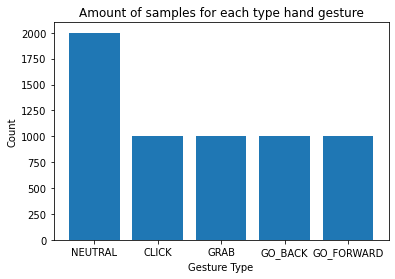

In [23]:
plt.bar(df_count.index, df_count.target)

plt.title('Amount of samples for each type hand gesture')
plt.xlabel("Gesture Type")
plt.ylabel("Count")

plt.show()

Data samples 

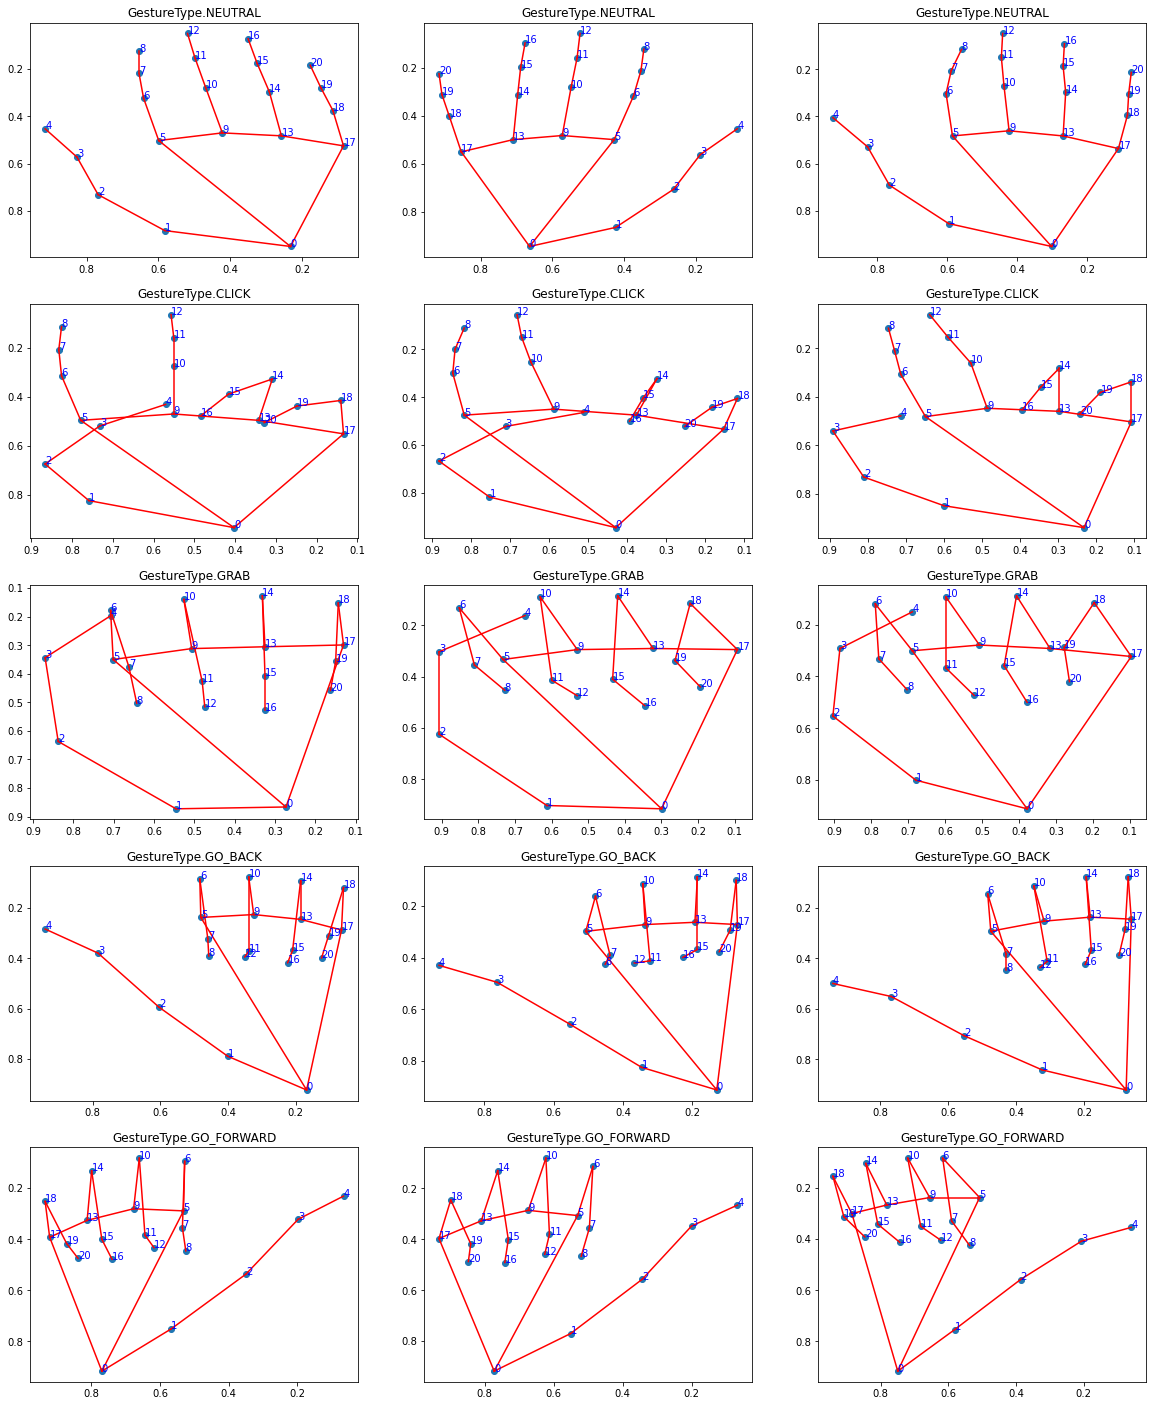

In [24]:
samples = df.loc[df.target == gesture_types[0]].sample(3).values.tolist()

for i in range(1, len(gesture_types)):
    samples = np.concatenate((samples, np.array(df.loc[df.target == gesture_types[i]].sample(3).values.tolist())))
    
plt.figure(figsize=(20, 25))
for i, sample in enumerate(samples):
    plt.subplot(5, 3, i+1)
    gesture_index = int(sample.item(0))
    sample_landmarks = sample[2:]
    sample_landmarks = np.split(sample_landmarks, len(sample_landmarks) / 3)
    
    draw_hand_gesture(sample_landmarks, f'{GestureType(gesture_index)}')
    

# 5. Preprocessing
---

In [25]:
data = df.copy()

In [26]:
X = data.drop('target', axis=1) # features
y = data['target'] # target value

### Standarise data

In [27]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [28]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.707107,-0.641770,0.493262,0.0,0.432747,0.803112,0.005202,0.751072,0.960206,0.386592,...,0.840589,-0.751177,0.879068,0.671573,-0.834977,-0.702494,0.066640,-0.876628,-1.306375,-0.301328
1,0.707107,-0.738563,0.470084,0.0,0.347458,0.775744,-0.267685,0.707501,0.872487,0.142252,...,1.248277,-0.737734,0.709385,1.070525,-0.776333,-1.027873,0.320546,-0.785206,-1.510703,-0.153095
2,0.707107,-0.754181,0.485587,0.0,0.367953,0.794049,-0.208182,0.703220,0.899470,0.214018,...,1.171729,-0.750266,0.715672,1.026075,-0.789386,-1.004293,0.312847,-0.798468,-1.493506,-0.145068
3,0.707107,-0.749596,0.523468,0.0,0.340786,0.772230,-0.366771,0.676378,0.918636,0.109047,...,1.613886,-0.769268,0.718864,1.436419,-0.810922,-1.024780,0.619971,-0.805868,-1.492172,0.080182
4,0.707107,-0.770494,0.530898,0.0,0.273384,0.847552,-0.440330,0.656600,0.978334,-0.008872,...,1.386722,-0.783323,0.709785,1.176780,-0.841072,-0.987276,0.391781,-0.852654,-1.470281,-0.103837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,-1.414214,1.765673,0.131073,0.0,0.709747,-0.091652,-0.698412,-0.797695,0.063608,-1.280844,...,-0.403657,1.565599,-0.766383,0.139116,1.503299,0.649298,0.908810,1.373214,0.651722,1.208258
5996,-1.414214,1.723586,0.120833,0.0,0.622526,-0.027367,-0.887840,-0.835892,0.044957,-1.578004,...,-1.065209,1.569267,-0.932806,-0.519336,1.517987,0.428033,0.393018,1.433452,0.665904,0.817339
5997,-1.414214,1.836358,0.294030,0.0,0.650397,-0.602646,-0.012891,-0.814901,0.257607,-0.687887,...,-1.415874,1.558612,-0.954090,-0.464447,1.493676,0.335670,0.580205,1.427218,0.664549,0.988939
5998,-1.414214,1.899163,0.320769,0.0,0.784301,-0.341591,-0.186809,-0.786859,0.205656,-1.019570,...,-1.971324,1.561865,-0.966201,-1.116824,1.507178,0.387486,0.166858,1.435095,0.595496,0.795108


# 6. Prepare Classicication models
---

## 6.1 Division of data into a training set and a test set

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

In [30]:
print(f'X_train shape {X_train.shape}')
print(f'y_train shape {y_train.shape}')
print(f'X_test shape {X_test.shape}')
print(f'y_test shape {y_test.shape}')
print(f'\nTest ratio: {len(X_test) / len(data):.2f}')
print(f'\ny_train:\n{y_train.value_counts()}')
print(f'\ny_test:\n{y_test.value_counts()}')

X_train shape (4200, 64)
y_train shape (4200,)
X_test shape (1800, 64)
y_test shape (1800,)

Test ratio: 0.30

y_train:
0    1396
2     707
4     706
3     696
1     695
Name: target, dtype: int64

y_test:
0    604
1    305
3    304
4    294
2    293
Name: target, dtype: int64


## 6.2 Classification models

##### Imports

In [13]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import seaborn as sns

##### Print Score Function

In [32]:
def get_score(classifier, X, y, train=True):
    conf_matrix = []
    report = {}

    if train:
        pred = classifier.predict(X)
        clf_report = pd.DataFrame(classification_report(y, pred, output_dict=True))
        report['report'] = clf_report
        print("================================================")
        print("Train Result:")
        print("================================================")
        clf_accuracy_score = accuracy_score(y, pred) * 100
        report['accuracy_score'] = clf_accuracy_score
        print(f"Accuracy Score: {clf_accuracy_score:.2f}%")
        print("________________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("________________________________________________")
        conf_matrix = confusion_matrix(y, pred)
        report['conf_matrix'] = conf_matrix
        print(f"Confusion Matrix: \n {conf_matrix}\n")
        
    elif train==False:
        pred = classifier.predict(X)
        clf_report = pd.DataFrame(classification_report(y, pred, output_dict=True))
        report['report'] = clf_report
        print("================================================")
        print("Test Result:") 
        print("================================================")    
        clf_accuracy_score = accuracy_score(y, pred) * 100
        report['accuracy_score'] = clf_accuracy_score
        print(f"Accuracy Score: {clf_accuracy_score:.2f}%")
        print("________________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("________________________________________________")
        conf_matrix = confusion_matrix(y, pred)
        report['conf_matrix'] = conf_matrix
        print(f"Confusion Matrix: \n {conf_matrix}\n")
    
    labels = [type.name for type in GestureType]

    table = pd.DataFrame(conf_matrix, columns=labels, index=labels)
    sns.heatmap(table, annot=True, fmt='d', cmap='viridis')
    
    return report

In [33]:
# Dict for all classification models
models = {}

### 6.2.1 Logistic Regression

Train Result:
Accuracy Score: 100.00%
________________________________________________
CLASSIFICATION REPORT:
                0      1      2      3      4  accuracy  macro avg  \
precision     1.0    1.0    1.0    1.0    1.0       1.0        1.0   
recall        1.0    1.0    1.0    1.0    1.0       1.0        1.0   
f1-score      1.0    1.0    1.0    1.0    1.0       1.0        1.0   
support    1396.0  695.0  707.0  696.0  706.0       1.0     4200.0   

           weighted avg  
precision           1.0  
recall              1.0  
f1-score            1.0  
support          4200.0  
________________________________________________
Confusion Matrix: 
 [[1396    0    0    0    0]
 [   0  695    0    0    0]
 [   0    0  707    0    0]
 [   0    0    0  696    0]
 [   0    0    0    0  706]]



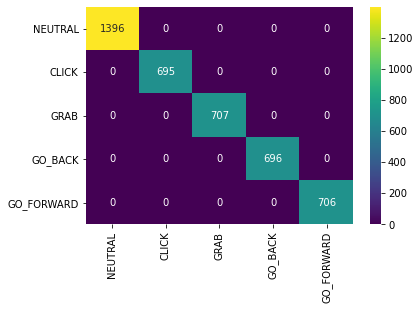

In [34]:
logistic_regression = LogisticRegression()
# Fit
logistic_regression.fit(X_train, y_train)

logistic_regression_train_report = get_score(logistic_regression, X_train, y_train, train=True)

In [35]:
models['logistic_regression'] = {
    'name': 'Logistic Regression',
    'model': logistic_regression,
    'train_report': logistic_regression_train_report
}

### 6.2.2 Ridge Classifier

Train Result:
Accuracy Score: 99.98%
________________________________________________
CLASSIFICATION REPORT:
                0      1           2           3      4  accuracy  \
precision     1.0    1.0    1.000000    0.998565    1.0  0.999762   
recall        1.0    1.0    0.998586    1.000000    1.0  0.999762   
f1-score      1.0    1.0    0.999292    0.999282    1.0  0.999762   
support    1396.0  695.0  707.000000  696.000000  706.0  0.999762   

             macro avg  weighted avg  
precision     0.999713      0.999762  
recall        0.999717      0.999762  
f1-score      0.999715      0.999762  
support    4200.000000   4200.000000  
________________________________________________
Confusion Matrix: 
 [[1396    0    0    0    0]
 [   0  695    0    0    0]
 [   0    0  706    1    0]
 [   0    0    0  696    0]
 [   0    0    0    0  706]]



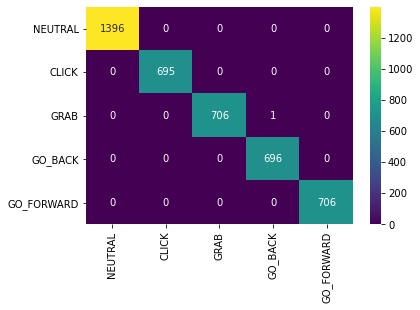

In [36]:
ridge_classifier = RidgeClassifier()
ridge_classifier.fit(X_train, y_train) # Fit

ridge_classifier_train_report = get_score(ridge_classifier, X_train, y_train, train=True)

In [37]:
models['ridge_classifier'] = {
    'name': 'Ridge Classifier',
    'model': ridge_classifier,
    'train_report': ridge_classifier_train_report
}

### 6.2.3 Random Forest Classifier

Train Result:
Accuracy Score: 100.00%
________________________________________________
CLASSIFICATION REPORT:
                0      1      2      3      4  accuracy  macro avg  \
precision     1.0    1.0    1.0    1.0    1.0       1.0        1.0   
recall        1.0    1.0    1.0    1.0    1.0       1.0        1.0   
f1-score      1.0    1.0    1.0    1.0    1.0       1.0        1.0   
support    1396.0  695.0  707.0  696.0  706.0       1.0     4200.0   

           weighted avg  
precision           1.0  
recall              1.0  
f1-score            1.0  
support          4200.0  
________________________________________________
Confusion Matrix: 
 [[1396    0    0    0    0]
 [   0  695    0    0    0]
 [   0    0  707    0    0]
 [   0    0    0  696    0]
 [   0    0    0    0  706]]



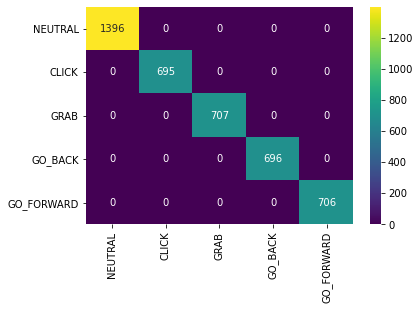

In [38]:
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train, y_train) # Fit

random_forest_classifier_train_report = get_score(random_forest_classifier, X_train, y_train, train=True)

In [39]:
models['random_forest_classifier'] = {
    'name': 'Random Forest Classifier',
    'model': random_forest_classifier,
    'train_report': random_forest_classifier_train_report
}

### 6.2.4 Support Vector Classification

In [15]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train) # Fit

svc_train_report = get_score(svc, X_train, y_train, train=True)

NameError: name 'get_score' is not defined

In [41]:
models['svc'] = {
    'name': 'SVC',
    'model': svc,
    'train_report': svc_train_report
}

## 6.3 Testing models

### 6.3.1 Logistic Regression

Test Result:
Accuracy Score: 99.94%
________________________________________________
CLASSIFICATION REPORT:
               0      1           2           3      4  accuracy    macro avg  \
precision    1.0    1.0    0.996599    1.000000    1.0  0.999444     0.999320   
recall       1.0    1.0    1.000000    0.996711    1.0  0.999444     0.999342   
f1-score     1.0    1.0    0.998296    0.998353    1.0  0.999444     0.999330   
support    604.0  305.0  293.000000  304.000000  294.0  0.999444  1800.000000   

           weighted avg  
precision      0.999446  
recall         0.999444  
f1-score       0.999444  
support     1800.000000  
________________________________________________
Confusion Matrix: 
 [[604   0   0   0   0]
 [  0 305   0   0   0]
 [  0   0 293   0   0]
 [  0   0   1 303   0]
 [  0   0   0   0 294]]



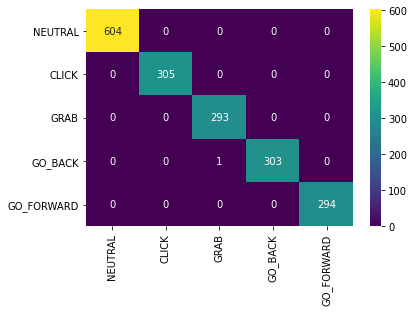

In [42]:
logistic_regression_test_report = get_score(logistic_regression, X_test, y_test, train=False)

In [43]:
models['logistic_regression']['test_report'] = logistic_regression_test_report

### 6.3.2 Ridge Classifier

Test Result:
Accuracy Score: 99.94%
________________________________________________
CLASSIFICATION REPORT:
                    0      1      2           3      4  accuracy    macro avg  \
precision    0.998347    1.0    1.0    1.000000    1.0  0.999444     0.999669   
recall       1.000000    1.0    1.0    0.996711    1.0  0.999444     0.999342   
f1-score     0.999173    1.0    1.0    0.998353    1.0  0.999444     0.999505   
support    604.000000  305.0  293.0  304.000000  294.0  0.999444  1800.000000   

           weighted avg  
precision      0.999445  
recall         0.999444  
f1-score       0.999444  
support     1800.000000  
________________________________________________
Confusion Matrix: 
 [[604   0   0   0   0]
 [  0 305   0   0   0]
 [  0   0 293   0   0]
 [  1   0   0 303   0]
 [  0   0   0   0 294]]



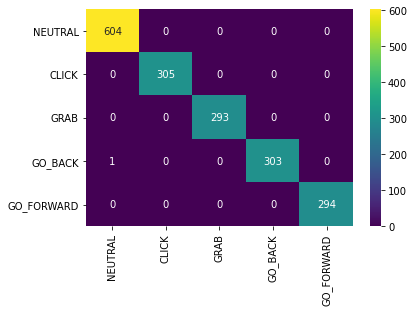

In [44]:
ridge_classifier_test_report = get_score(ridge_classifier, X_test, y_test, train=False)

In [45]:
models['ridge_classifier']['test_report'] = ridge_classifier_test_report

### 6.3.3 Random Forest Classifier

Test Result:
Accuracy Score: 99.89%
________________________________________________
CLASSIFICATION REPORT:
                    0      1           2           3      4  accuracy  \
precision    0.998347    1.0    0.996599    1.000000    1.0  0.998889   
recall       1.000000    1.0    1.000000    0.993421    1.0  0.998889   
f1-score     0.999173    1.0    0.998296    0.996700    1.0  0.998889   
support    604.000000  305.0  293.000000  304.000000  294.0  0.998889   

             macro avg  weighted avg  
precision     0.998989      0.998892  
recall        0.998684      0.998889  
f1-score      0.998834      0.998888  
support    1800.000000   1800.000000  
________________________________________________
Confusion Matrix: 
 [[604   0   0   0   0]
 [  0 305   0   0   0]
 [  0   0 293   0   0]
 [  1   0   1 302   0]
 [  0   0   0   0 294]]



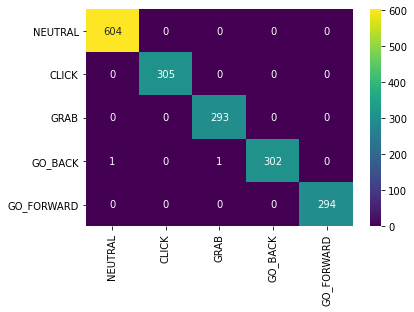

In [46]:
random_forest_classifier_test_report = get_score(random_forest_classifier, X_test, y_test, train=False)

In [47]:
models['random_forest_classifier']['test_report'] = random_forest_classifier_test_report

### 6.3.4 Support Vector Classification

Test Result:
Accuracy Score: 100.00%
________________________________________________
CLASSIFICATION REPORT:
               0      1      2      3      4  accuracy  macro avg  \
precision    1.0    1.0    1.0    1.0    1.0       1.0        1.0   
recall       1.0    1.0    1.0    1.0    1.0       1.0        1.0   
f1-score     1.0    1.0    1.0    1.0    1.0       1.0        1.0   
support    604.0  305.0  293.0  304.0  294.0       1.0     1800.0   

           weighted avg  
precision           1.0  
recall              1.0  
f1-score            1.0  
support          1800.0  
________________________________________________
Confusion Matrix: 
 [[604   0   0   0   0]
 [  0 305   0   0   0]
 [  0   0 293   0   0]
 [  0   0   0 304   0]
 [  0   0   0   0 294]]



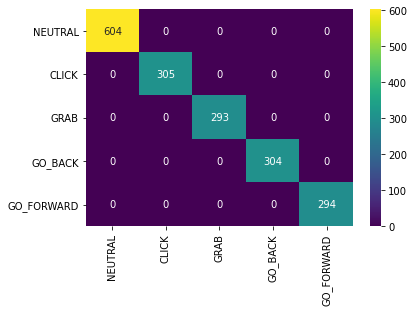

In [48]:
svc_test_report = get_score(svc, X_test, y_test, train=False)

In [49]:
models['svc']['test_report'] = svc_test_report

# 7. Compare the results
---

Preparation of a table comparing classification models

In [50]:
data = []
for name, clf in models.items():
    data.append([clf['name'], clf['train_report']['accuracy_score'], clf['test_report']['accuracy_score']])
    

pd.DataFrame(data=data, columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,100.00000,99.944444
1,Ridge Classifier,99.97619,99.944444
2,Random Forest Classifier,100.00000,99.888889
3,SVC,100.00000,100.000000


In [51]:
import seaborn as sns

<AxesSubplot:>

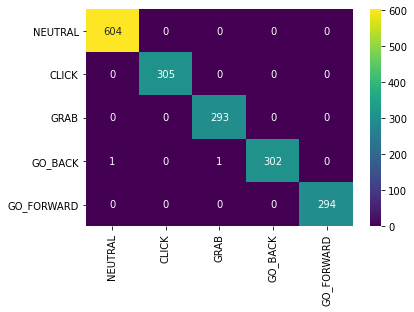

In [53]:
confusion_matrix = models['random_forest_classifier']['test_report']['conf_matrix']
labels = [type.name for type in GestureType]

table = pd.DataFrame(confusion_matrix, columns=labels, index=labels)
sns.heatmap(table, annot=True, fmt='d', cmap='viridis')

# 8. Save model
---

## 8.1 Prepare file with model

In [5]:
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler 

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import accuracy_score # Accuracy metrics 

In [10]:
data = df.copy()

X = data.drop('target', axis=1) # features
y = data['target'] # target value

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

In [16]:
pipelines = {
    'lr': make_pipeline(StandardScaler(), LogisticRegression()),
    'rc': make_pipeline(StandardScaler(), RidgeClassifier()),
    'rf': make_pipeline(StandardScaler(), RandomForestClassifier()),
    'scv': make_pipeline(StandardScaler(), SVC(probability=True)),
}

In [17]:
fit_models = {}
for algo, pipeline in pipelines.items():
    print(algo)
    model = pipeline.fit(X_train, y_train)
    fit_models[algo] = model

lr
rc
rf
scv


In [18]:
for algo, model in fit_models.items():
    yhat = model.predict(X_test)
    print(algo, accuracy_score(y_test, yhat))

lr 0.9994444444444445
rc 0.9994444444444445
rf 0.9988888888888889
scv 1.0


In [19]:
with open(MODEL_FILE_NAME, 'wb') as f:
    pickle.dump(fit_models['scv'], f)

In [20]:
svc_pipeline = make_pipeline(StandardScaler(), SVC())
model = svc_pipeline.fit(X_train, y_train)

with open(MODEL_FILE_NAME, 'wb') as f:
    pickle.dump(fit_models['scv'], f)

## 8.2. Live presentation (with camera) 
---
You cat try classify hand gestures by your web camera. 

After successful classifing, predicted value will show in application window 

##### Imports

In [61]:
import pickle

from hand_gesture_detector import HandGestureDetector
import utils.draw_utils as du

Load classification model from file

In [62]:
with open(MODEL_FILE_NAME, 'rb') as f:
    model = pickle.load(f)
    
model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier', RandomForestClassifier())])

In [63]:
# cam_width, cam_height = 1280, 720
cap = CameraVideoCapture()
# cap.set(3, cam_width)
# cap.set(4, cam_height)

detector = hd.HandDetector(max_num_hands=2)
gesture_detector = HandGestureDetector()

while cap.is_opened():
    success, img = cap.read()
    all_hands, img = detector.find_hands(img)
    
    for hand in all_hands:
        if hand.type == HandType.RIGHT:
            detection_result = gesture_detector.predict(hand)
            
            if detection_result:
                du.draw_gesture_info(img, detection_result, hand.border_box)
        

    cv2.imshow("Live Model Testing", img)
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()